In [2]:
%pip install seaborn

                                              0.0/294.6 kB ? eta -:--:--
                                              0.0/294.6 kB ? eta -:--:--
                                              0.0/294.6 kB ? eta -:--:--
     ------                                   51.2/294.6 kB ? eta -:--:--
     -------                               61.4/294.6 kB 812.7 kB/s eta 0:00:01
     -------                               61.4/294.6 kB 812.7 kB/s eta 0:00:01
     -------                               61.4/294.6 kB 812.7 kB/s eta 0:00:01
     -------                               61.4/294.6 kB 812.7 kB/s eta 0:00:01
     ---------                             71.7/294.6 kB 280.5 kB/s eta 0:00:01
     ----------                            81.9/294.6 kB 241.3 kB/s eta 0:00:01
     -----------                           92.2/294.6 kB 261.7 kB/s eta 0:00:01
     -----------                           92.2/294.6 kB 261.7 kB/s eta 0:00:01
     -----------                           92.2/294.6 kB 261.7 kB/s


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#modules used
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [11]:
# Loading the Wisconsin breast cancer dataset
data = pd.read_csv('C:\Users\Akshara\Downloads\Akshara-211AI012-Sowjanya-211AI037-Endsem-Programfiles\Akshara-211AI012-Sowjanya-211AI037-Endsem-Programfiles\wdbc_data.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (592501018.py, line 2)

# **DATA CLEANING**

In [8]:
data.head(10)

NameError: name 'data' is not defined

In [ ]:
data.drop('id', axis =1, inplace=True)
#we drop the id column
data.head(3)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
data.shape

(569, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

**Editing the dataset**

In [ ]:
# data.at[3, 'texture_mean'] = None

In [ ]:
# data.head(5)

In [ ]:
# data.isnull().any()

In [ ]:
# data.info()

In [ ]:
# data.replace({'diagnosis': 'M'}, {'diagnosis': 'B'}, inplace=True)


In [ ]:
# data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_features = data.drop(columns=['diagnosis'])
data_st = pd.DataFrame(scaler.fit_transform(data_features), columns=data_features.columns)
data_st

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


# **EXPLORATORY DATA ANALYSIS**

A. descriptive statistics

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.skew()

<ipython-input-16-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [ ]:
data_st.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [ ]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
p=data.groupby('diagnosis',axis=0)
pd.DataFrame(p.size(),columns=['Number of observations'])

,Number of observations
diagnosis,
B,357
M,212


B. Data visulization

In [ ]:
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['axes.titlesize'] = 'large'

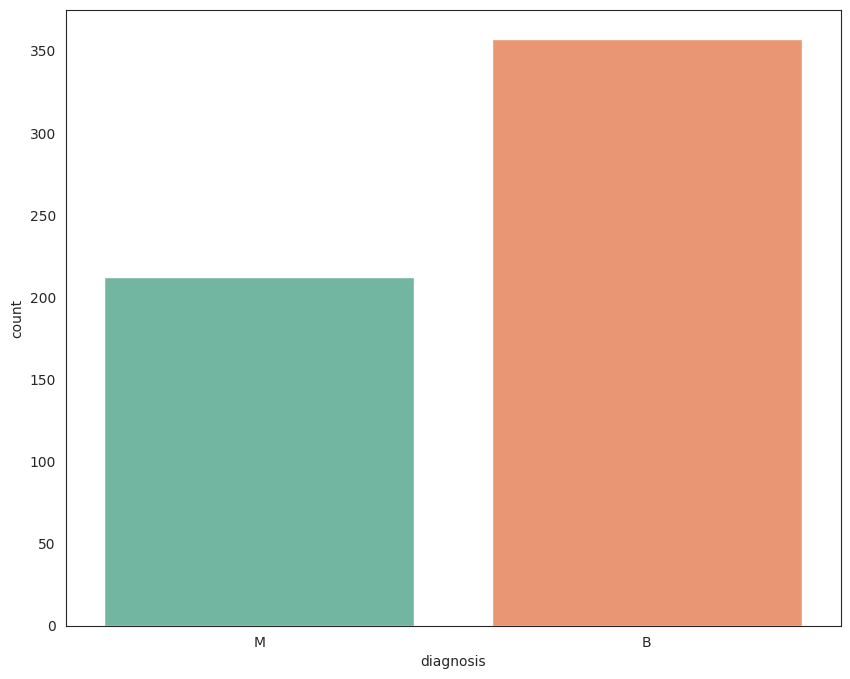

In [ ]:

sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(data=data, x='diagnosis', label='Count', palette="Set2")

plt.show()


In [ ]:
data_mean=data_st.iloc[:,0:10]
data_se=data.iloc[:,10:20]
data_worst=data.iloc[:,20:]

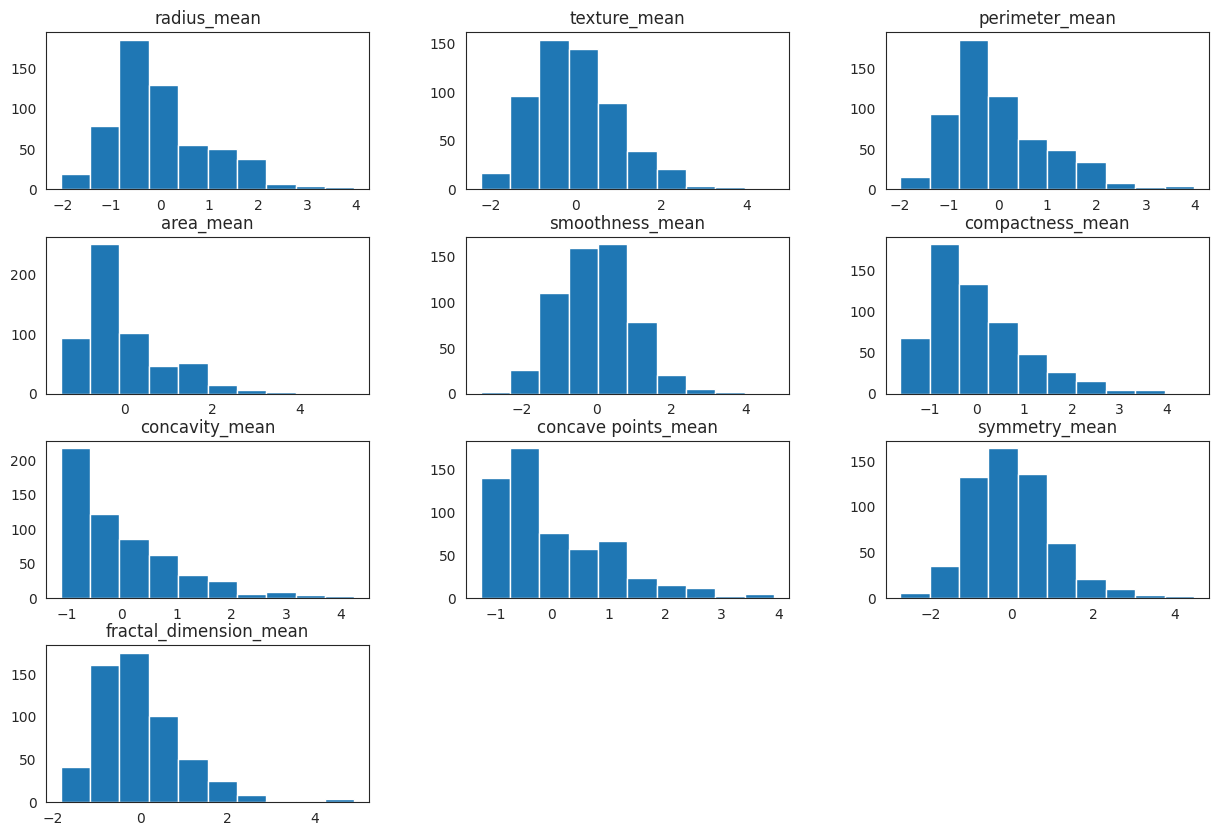

In [ ]:
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

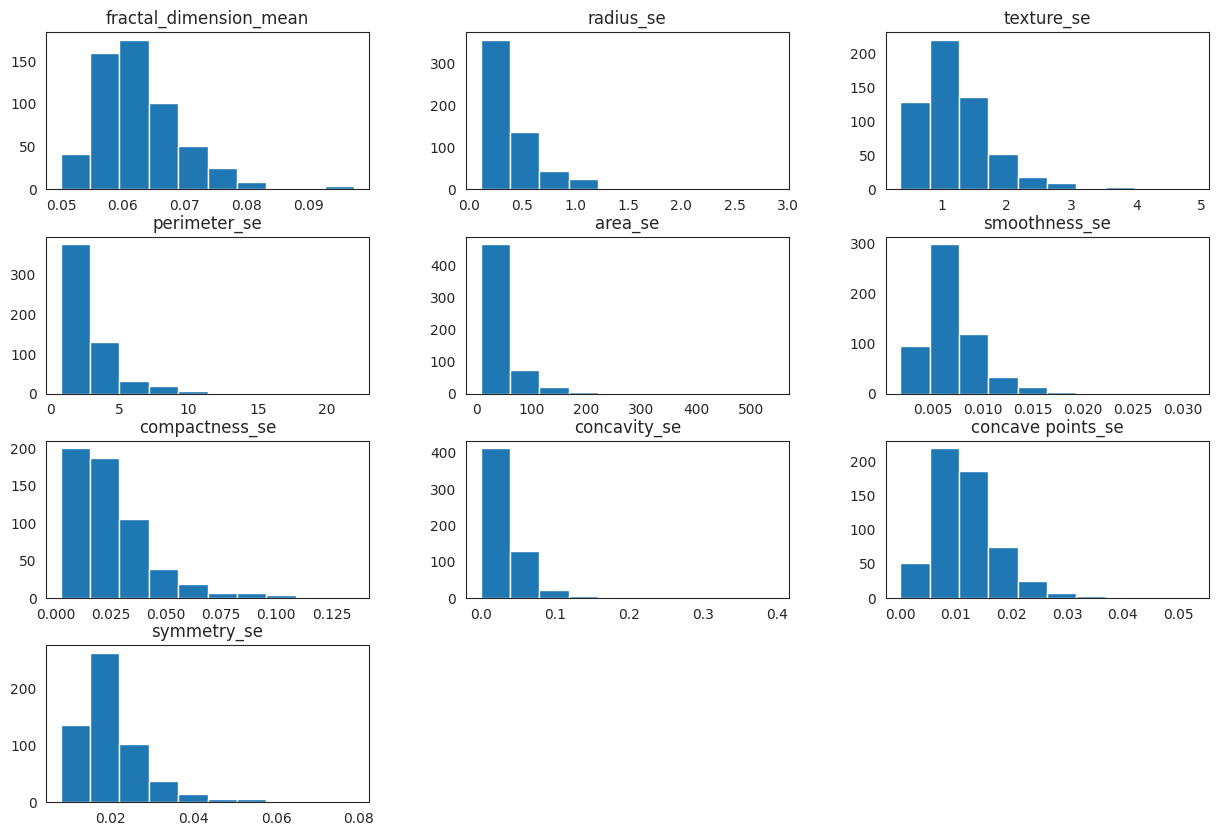

In [ ]:
hist_se=data_se.hist(bins=10, figsize=(15, 10),grid=False,)

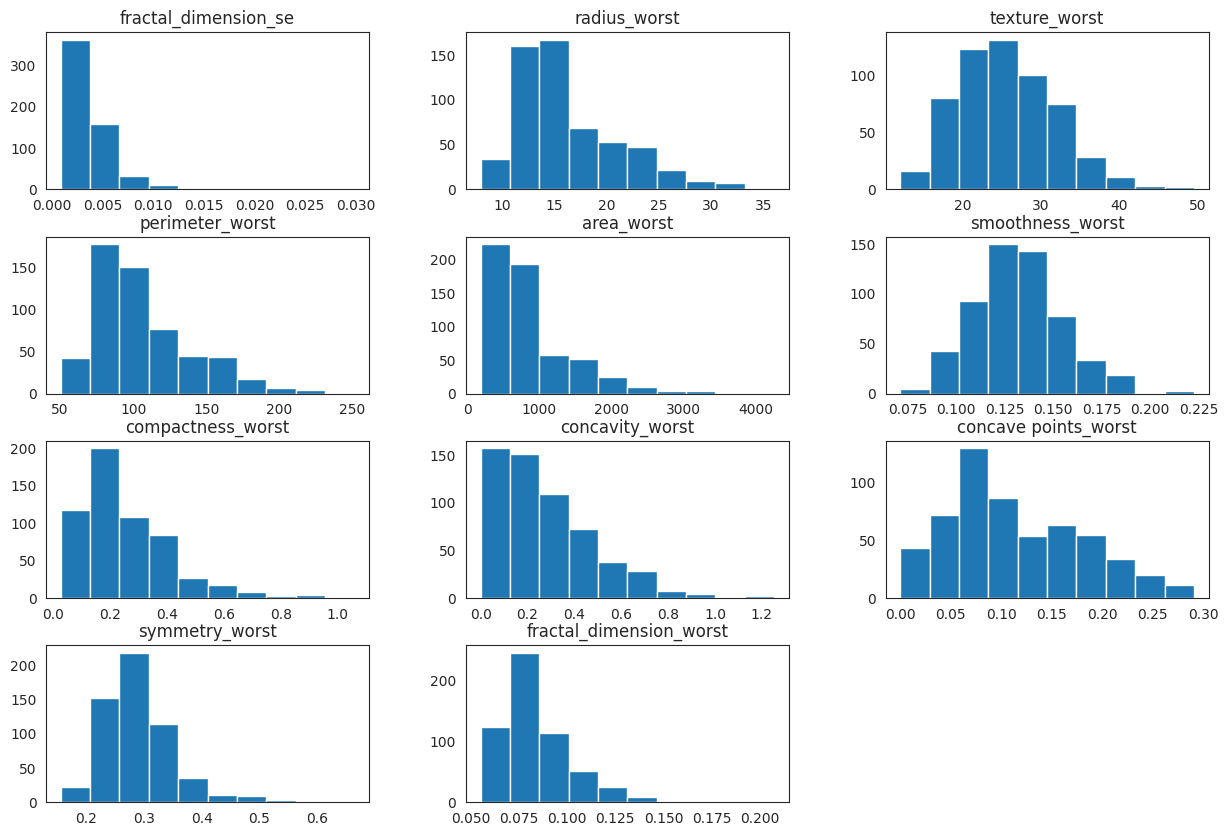

In [ ]:
hist_worst=data_worst.hist(bins=10, figsize=(15, 10),grid=False,)

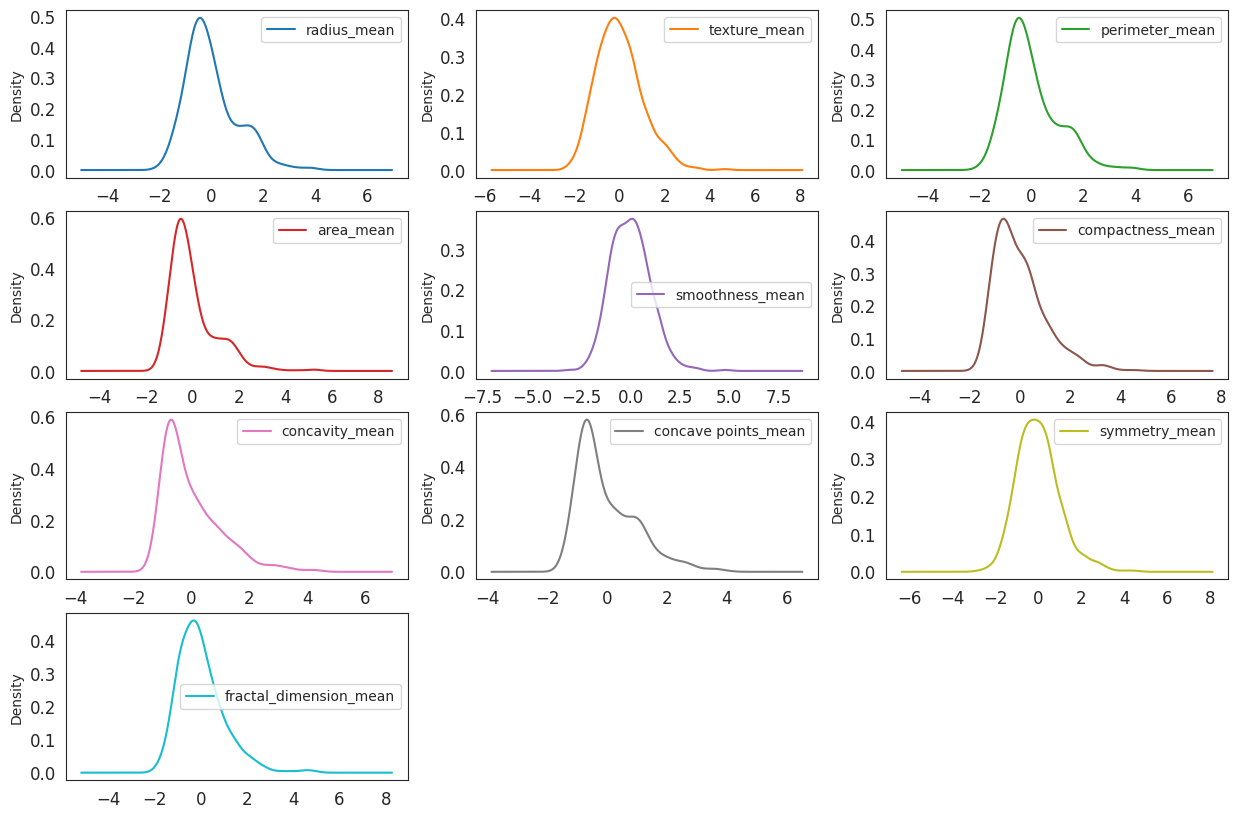

In [ ]:
#Density Plots
plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                     sharey=False, fontsize=12, figsize=(15,10))

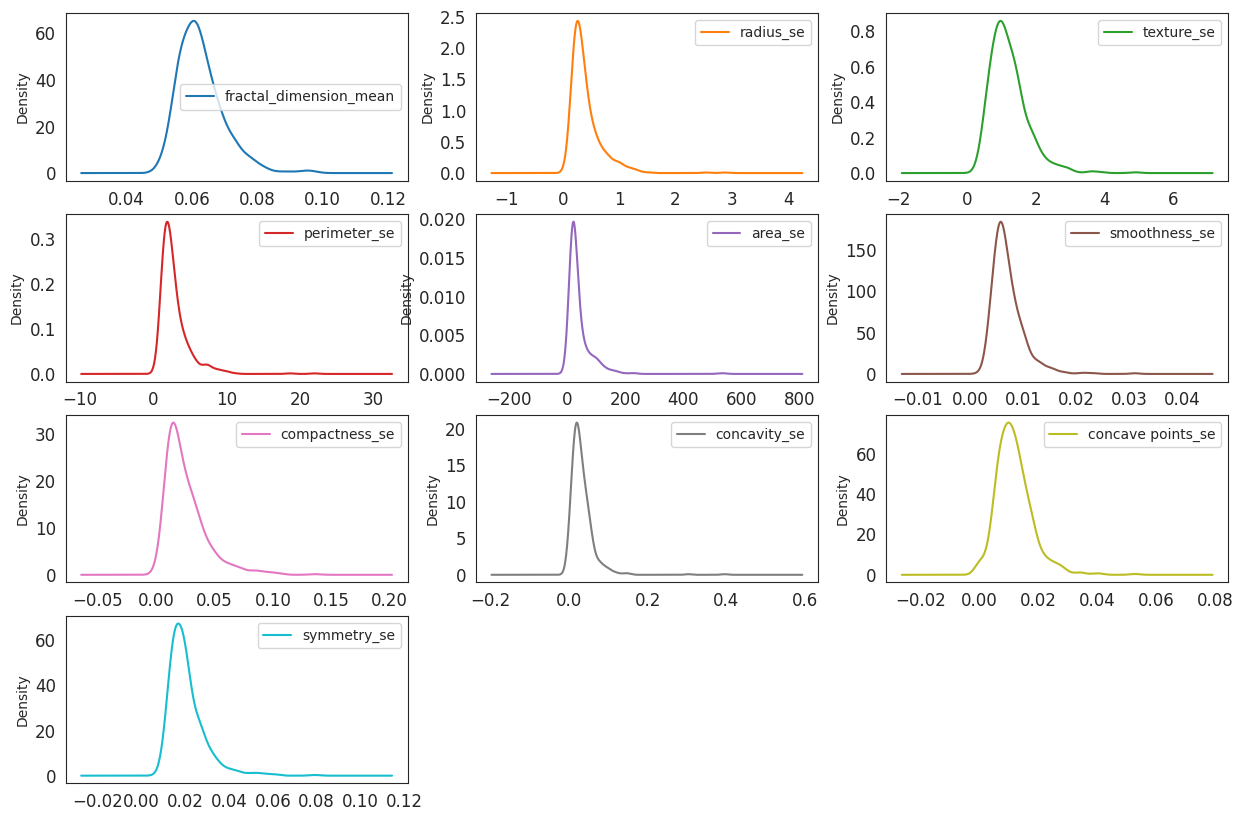

In [ ]:
#Density Plots
plt = data_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                    sharey=False, fontsize=12, figsize=(15,10))

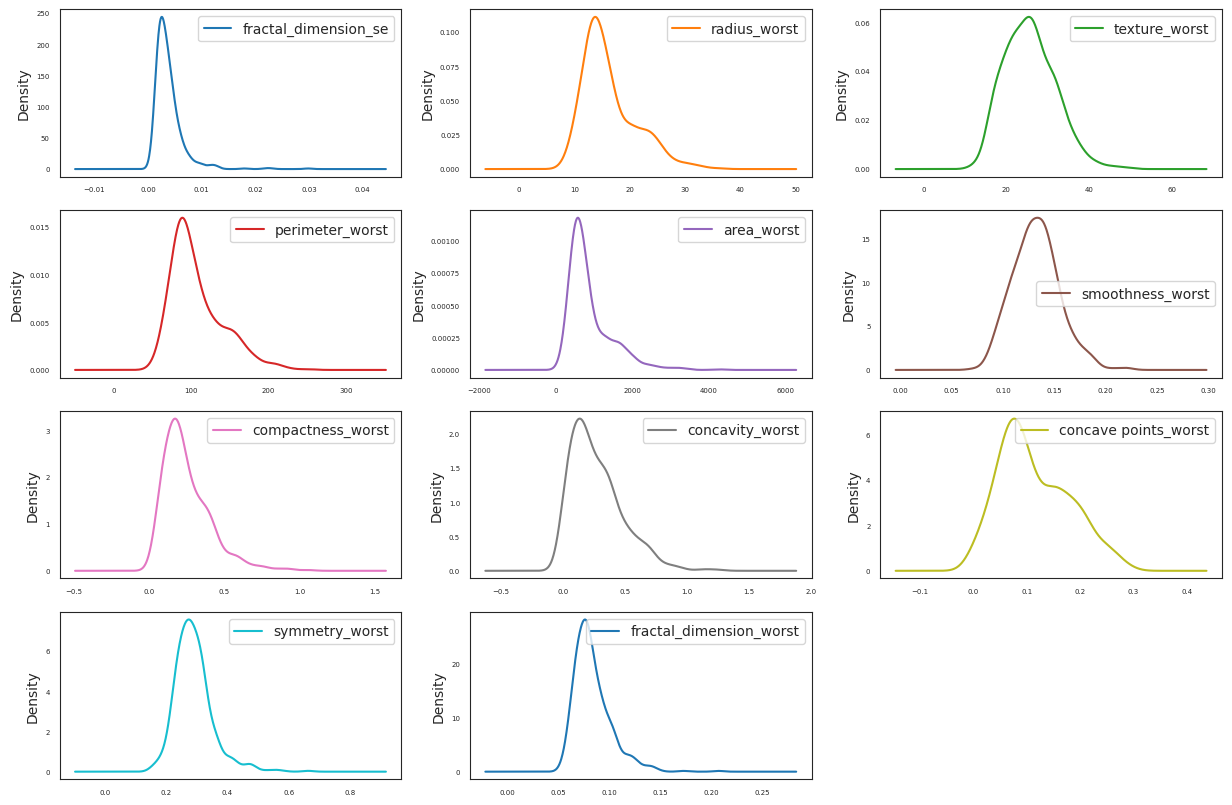

In [ ]:
#Density Plots
plt = data_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,
                    fontsize=5, figsize=(15,10))

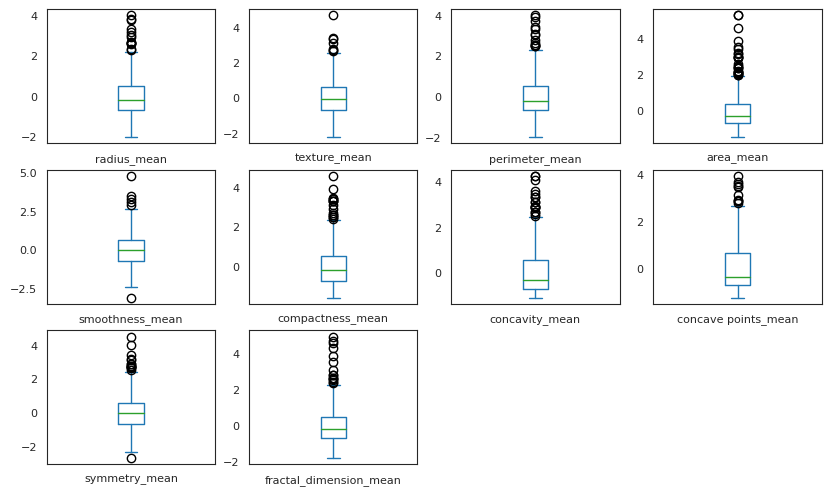

In [ ]:
# box and whisker plots
plt=data_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                 fontsize=8)

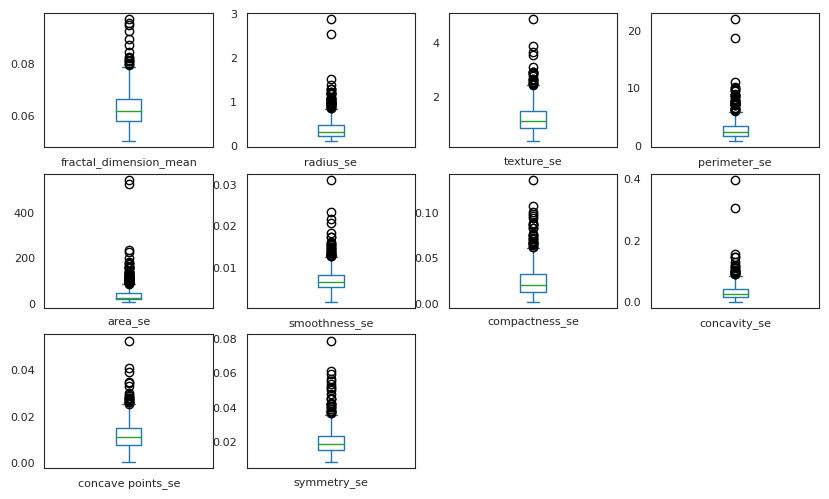

In [ ]:
# box and whisker plots
plt=data_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
               fontsize=8)

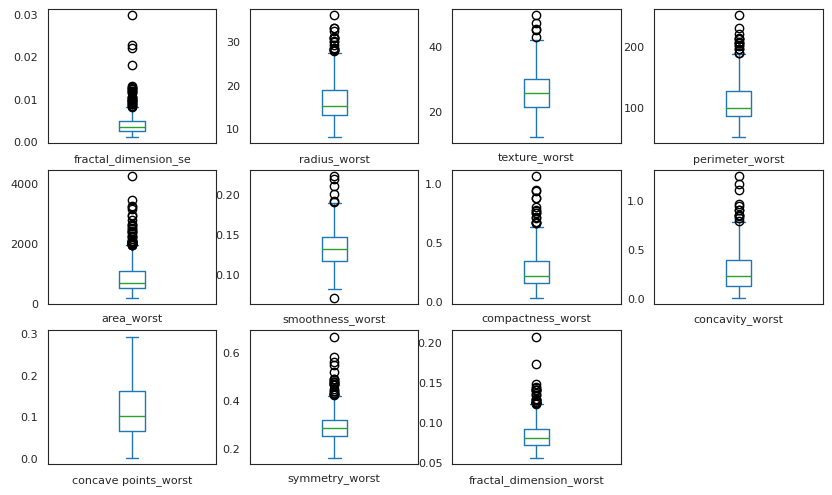

In [ ]:
# box and whisker plots
plt=data_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                  fontsize=8)

<ipython-input-32-76d6d1a4eac2>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

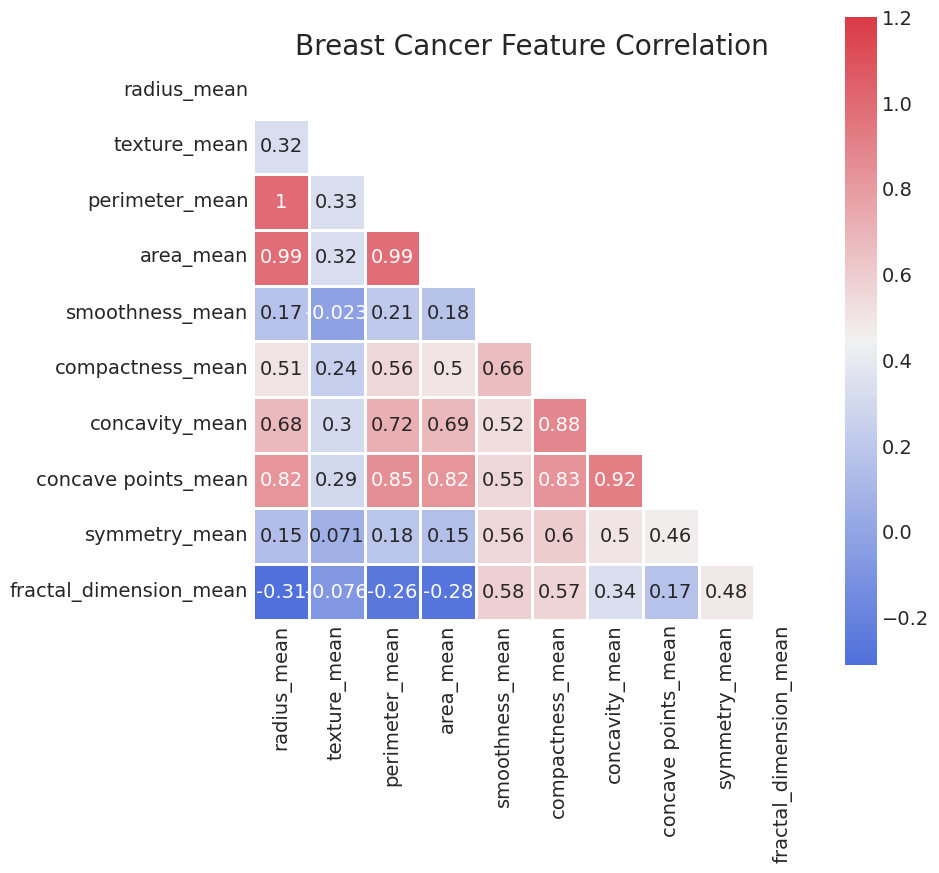

In [ ]:
from matplotlib import pyplot as pyplt
pyplt.style.use('fivethirtyeight')
sns.set_style("white")

# Compute the correlation matrix
corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
dataa, ax = pyplt.subplots(figsize=(8, 8))
pyplt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask,
            ax=ax,annot=True, fmt='.2g',linewidths=2)

<ipython-input-33-d2fa3aa95a95>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

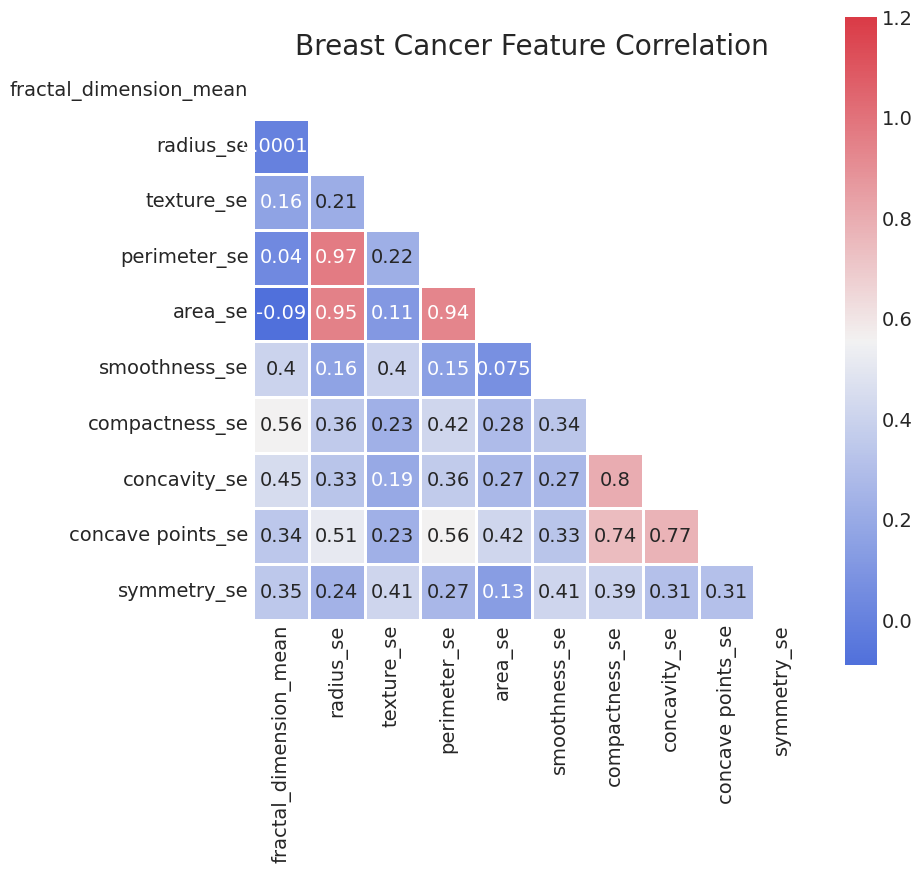

In [ ]:
from matplotlib import pyplot as pyplt
pyplt.style.use('fivethirtyeight')
sns.set_style("white")

# Compute the correlation matrix
corr = data_se.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
dataa, ax = pyplt.subplots(figsize=(8, 8))
pyplt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask,
            ax=ax,annot=True, fmt='.2g',linewidths=2)

<ipython-input-34-df1a0b4d88ce>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

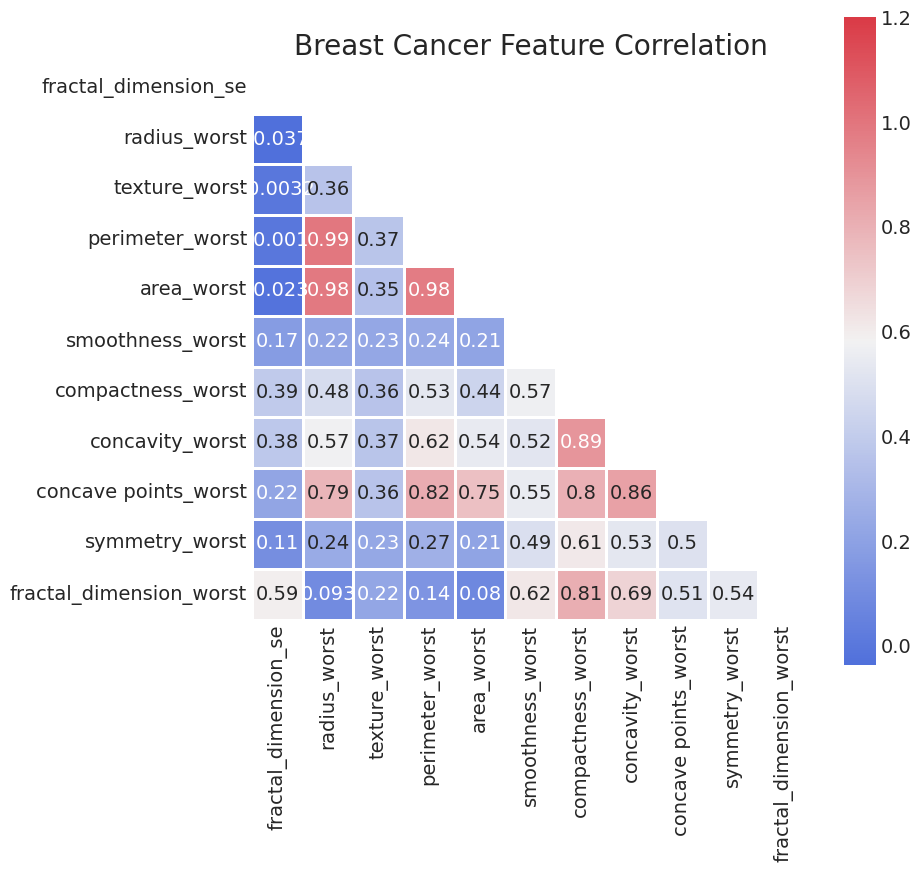

In [ ]:
from matplotlib import pyplot as pyplt
pyplt.style.use('fivethirtyeight')
sns.set_style("white")

# Compute the correlation matrix
corr = data_worst.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
dataa, ax = pyplt.subplots(figsize=(8, 8))
pyplt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask,
            ax=ax,annot=True, fmt='.2g',linewidths=2)

# **DATA PREPROCESSING AND FEATURE SELECTION**

In [ ]:
X = data.drop(columns=["diagnosis"])
# Calculate the correlation matrix
correlation_matrix = X.corr()
y = data["diagnosis"]

X_normalized = scaler.fit_transform(X)

In [ ]:
X_normalized

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

**Feature Selection Using ANOVA**

ANOVA (Analysis of Variance) feature selection can be a valuable technique for selecting relevant features from the Breast Cancer Wisconsin (Diagnostic) Data Set. This method helps determine which features have the most significant impact on the target variable (Malignant or Benign), which can be crucial in building an effective classification model.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif


selector = SelectKBest(score_func=f_classif, k=11)
X_new = selector.fit_transform(X_normalized, y)


In [ ]:
X_new

array([[ 1.09706398,  1.26993369,  0.9843749 , ...,  2.00123749,
         2.10952635,  2.29607613],
       [ 1.82982061,  1.68595471,  1.90870825, ...,  1.89048899,
        -0.14674897,  1.0870843 ],
       [ 1.57988811,  1.56650313,  1.55888363, ...,  1.45628455,
         0.85497394,  1.95500035],
       ...,
       [ 0.70228425,  0.67267578,  0.57795264, ...,  0.42790561,
         0.3267666 ,  0.41406869],
       [ 1.83834103,  1.98252415,  1.73521799, ...,  1.65317077,
         3.19760468,  2.28998549],
       [-1.80840125, -1.81438851, -1.34778924, ..., -1.07581292,
        -1.30583065, -1.74506282]])

In [ ]:
len(X_new[0])

11

In [ ]:

selected_feature_indices = selector.get_support(indices=True)

selected_feature_names_ANOVA = X.columns[selected_feature_indices]

print("Selected Feature Names using ANOVA:")
print(selected_feature_names_ANOVA)


Selected Feature Names using ANOVA:
Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


**Feature Selection Using Kendall's Tau**

Kendall's Tau (Kendall's rank correlation coefficient) is a measure of association for ordinal data and can be used when the relationship between variables is not linear.
Kendall's Tau correlation coefficient is calculated between each feature and the target variable to select the top 11 features.

In [ ]:
import numpy as np
from scipy.stats import kendalltau
p_values=[]
scores=[]
def kendall_tau_score(X, y):
    scores = []
    for feature in range(X.shape[1]):
        tau, _ = kendalltau(X[:, feature], y)
        scores.append(abs(tau))
        p_values.append(_)
    return np.array(scores)



selector = SelectKBest(score_func=kendall_tau_score, k=11)
X_new = selector.fit_transform(X_normalized, y)

selected_feature_indices = selector.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]

print("Selected Feature Names using Kendall's Tau :")
print(selected_feature_names)


Selected Feature Names using Kendall's Tau :
Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


**Feature selection Recursive Elimination Method**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
n_features_to_select = 11
rfe = RFE(estimator=classifier, n_features_to_select=n_features_to_select)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print(selected_features)



Index(['radius_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


**Feature selection using CFS**

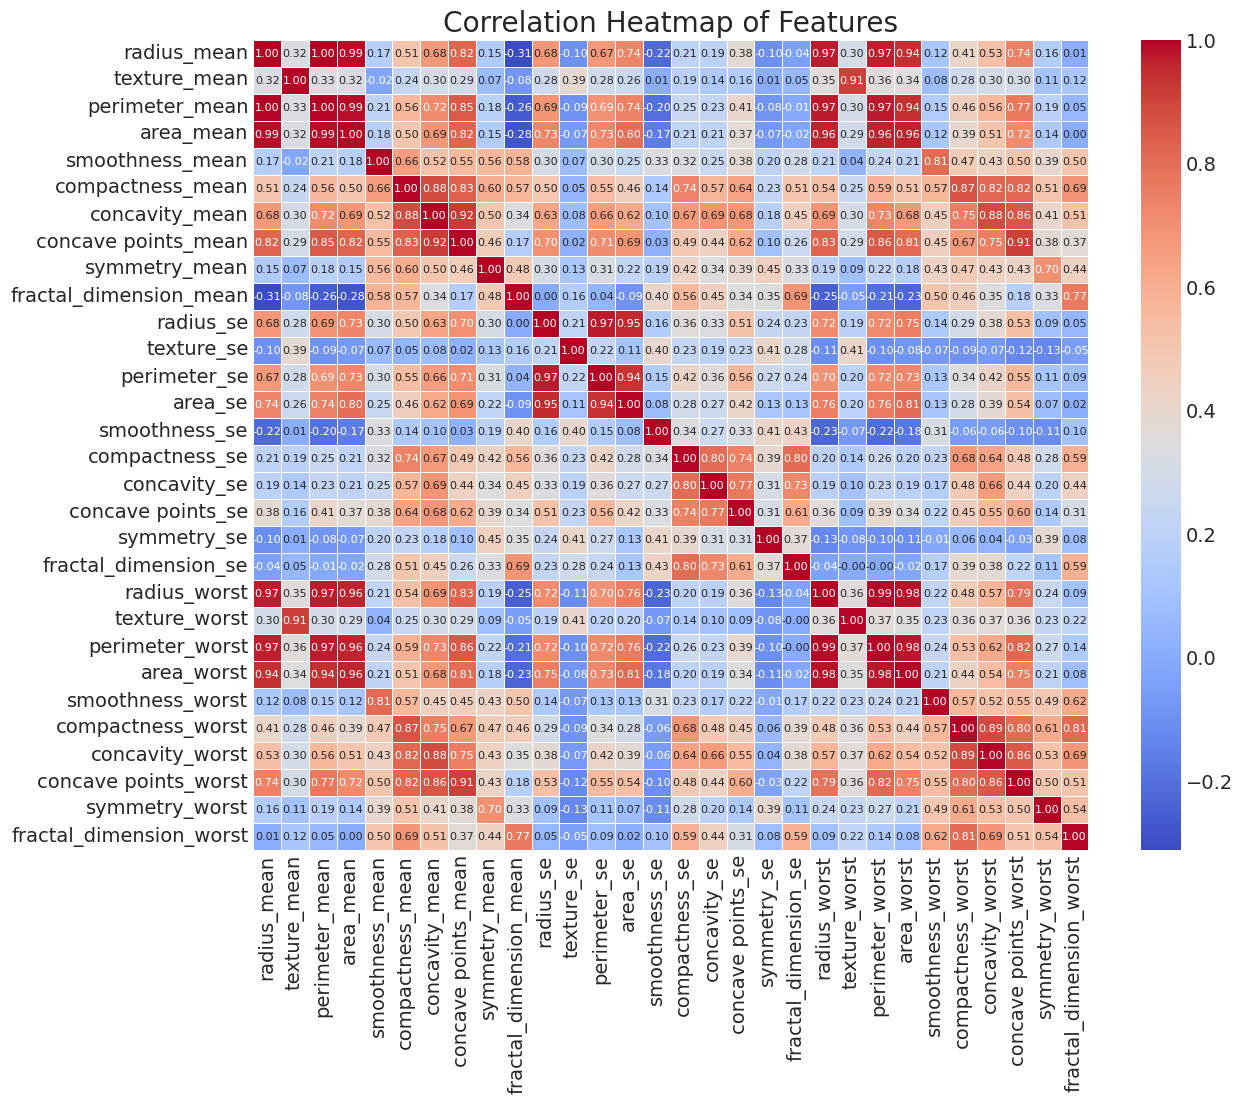

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
annot_font_size = 8
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            annot_kws={"size": annot_font_size})
plt.title("Correlation Heatmap of Features")
plt.show()

In [ ]:
# Encode the categorical label
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)





fit_transform is used to encode the categorical label y and store the encoded labels in y_encoded. Now, y_encoded contains numerical representations of the original categorical labels in y

In [ ]:
y_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
# Calculate feature correlations with the encoded label
correlations = X.corrwith(pd.Series(y_encoded))
print(correlations)


radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
concave points_worst       0

we calculate the Pearson correlation coefficients between each feature in the dataset X and the encoded categorical label y_encoded.
correlations will contain correlation coefficients for each feature. These coefficients indicate how linearly correlated each feature is with the encoded label. Positive values indicate a positive correlation, while negative values indicate a negative correlation.

In [ ]:
# Select the top 11 features with the highest absolute correlations
num_features_to_select = 11
selected_features_k = correlations.abs().sort_values(ascending=False).index[:num_features_to_select]

print("Top 11 Selected Features:")
print(selected_features_k)

Top 11 Selected Features:
Index(['concave points_worst', 'perimeter_worst', 'concave points_mean',
       'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean',
       'area_mean', 'concavity_mean', 'concavity_worst', 'compactness_mean'],
      dtype='object')


then we calculate the absolute values of the correlation coefficients using correlations.abs(). This ensures that both positive and negative correlations are considered.
next we sort the features based on their absolute correlation values in descending order using sort_values(ascending=False). This places the features with the highest absolute correlations at the top.
we use .index to retrieve the names (labels) of the selected features and store them in selected_features.

Overall, this is a simple method for feature selection based on the correlation between features and a categorical label. It selects the top 11 features that are most strongly correlated with the label, regardless of whether the correlation is positive or negative.

**Feature Selection using CFS and PCA**

In [ ]:


import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
# Encode the categorical label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



we use fit_transform to encode the categorical label y and store the encoded labels in y_encoded. Now, y_encoded contains numerical representations of the original categorical labels in y

In [ ]:
# Apply PCA for dimensionality reduction
desired_num_components = 20  # Adjust the desired number of components
pca = PCA(n_components=desired_num_components)
X_pca = pca.fit_transform(X)

X_pca

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01, ...,
         1.02633549e-02, -9.36289730e-03, -4.73832307e-02],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01, ...,
        -6.00943232e-03,  1.67073824e-02,  2.08232414e-02],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00, ...,
        -2.80435466e-02,  4.85695646e-03, -1.46811680e-02],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01, ...,
        -4.48402164e-03,  7.27531938e-03,  1.36970100e-02],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01, ...,
         4.36511869e-02,  1.24197545e-02, -4.18905272e-02],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01, ...,
        -2.83230311e-02,  1.34396184e-02, -3.54712727e-02]])

In [ ]:
type(X_pca)

numpy.ndarray

then we create an instance of PCA called pca with the desired number of components.
we apply PCA to the feature matrix X using fit_transform, resulting in a transformed matrix X_pca. The transformed data is represented in terms of PCA components, which are linear combinations of the original features.

In [ ]:
# Calculate feature correlations with the encoded label
correlations = X_pca.T @ y_encoded

print(correlations)

[ 1.34224249e+05 -9.14309765e+02 -7.01664622e+02 -6.99784619e+02
  1.06654143e+02  9.61030028e+00  1.94743103e+01  1.48742221e+00
 -7.29848843e+00 -3.97226053e+00  1.10203140e+01 -4.44450107e-01
 -2.63853256e-02  9.79823337e-01 -2.70909403e-01 -7.57118615e-01
 -3.94998659e-01 -1.08468491e-01 -6.51870168e-02 -1.28599136e-01]


next we Calculate the correlations between the PCA components (X_pca) and the encoded categorical label (y_encoded) using matrix multiplication (@ operator).
X_pca.T represents the transpose of the PCA components matrix, allowing us to perform the dot product with y_encoded.

In [ ]:
import numpy as np

num_features_to_select = 11

correlations = np.corrcoef(np.column_stack((X_pca, y_encoded)), rowvar=False)
feature_correlations = correlations[:-1, -1]

selected_feature_indices = np.abs(feature_correlations).argsort()[-num_features_to_select:][::-1]

selected_features = selected_feature_indices

selected_features = X.columns[selected_feature_indices]


print(selected_features)


Index(['radius_mean', 'area_mean', 'radius_se', 'compactness_se',
       'perimeter_mean', 'area_se', 'concavity_se', 'symmetry_mean',
       'smoothness_mean', 'concavity_mean', 'fractal_dimension_mean'],
      dtype='object')


Then we calculate the absolute values of the correlations using abs(correlations) to ensure that both positive and negative correlations are considered.
we have used argsort() to obtain the indices that would sort the absolute correlations in ascending order. Then, we select the last num_features_to_select indices using [-num_features_to_select:].
we Retrieve the feature names (labels) corresponding to the selected indices from the original feature matrix X and store them in selected_features.

**New Dataset**

In [ ]:
selected_features_WEKA=['texture_mean','concavity_mean','concave points_mean','area_se','symmetry_se','radius_worst','perimeter_worst','area_worst','smoothness_worst','concavity_worst','concave points_worst']


x_new=data_st
columns=x_new.columns
for item in columns:
  if(item=='diagnosis'):
    continue
  elif(item not in selected_features_WEKA):
    x_new=x_new.drop(columns=[item])
x_new

,texture_mean,concavity_mean,concave points_mean,area_se,symmetry_se,radius_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst
0,-2.073335,2.652874,2.532475,2.487578,1.148757,1.886690,2.303601,2.001237,1.307686,2.109526,2.296076
1,-0.353632,-0.023846,0.548144,0.742402,-0.805450,1.805927,1.535126,1.890489,-0.375612,-0.146749,1.087084
2,0.456187,1.363478,2.037231,1.181336,0.237036,1.511870,1.347475,1.456285,0.527407,0.854974,1.955000
3,0.253732,1.915897,1.451707,-0.288378,4.732680,-0.281464,-0.249939,-0.550021,3.394275,1.989588,2.175786
4,-1.151816,1.371011,1.428493,1.190357,-0.361092,1.298575,1.338539,1.220724,0.220556,0.613179,0.729259
...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,1.947285,2.320965,2.604187,-1.138416,1.901185,1.752563,2.015301,0.378365,0.664512,1.629151
565,2.085134,0.693043,1.263669,1.291565,-0.189161,1.536720,1.421940,1.494959,-0.691230,0.236573,0.733827
566,2.045574,0.046588,0.105777,0.180698,-0.891416,0.561361,0.579001,0.427906,-0.809587,0.326767,0.414069
567,2.336457,3.296944,2.658866,1.009503,0.326634,1.961239,2.303601,1.653171,1.430427,3.197605,2.289985


# BUILDING MODEL

In [ ]:
data_st

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [ ]:
X = data_st[selected_features_WEKA]

data.iloc[6]

diagnosis                         M
radius_mean                   18.25
texture_mean                  19.98
perimeter_mean                119.6
area_mean                    1040.0
smoothness_mean             0.09463
compactness_mean              0.109
concavity_mean               0.1127
concave points_mean           0.074
symmetry_mean                0.1794
fractal_dimension_mean      0.05742
radius_se                    0.4467
texture_se                   0.7732
perimeter_se                   3.18
area_se                       53.91
smoothness_se              0.004314
compactness_se              0.01382
concavity_se                0.02254
concave points_se           0.01039
symmetry_se                 0.01369
fractal_dimension_se       0.002179
radius_worst                  22.88
texture_worst                 27.66
perimeter_worst               153.2
area_worst                   1606.0
smoothness_worst             0.1442
compactness_worst            0.2576
concavity_worst             

In [ ]:
y=data['diagnosis'].apply(lambda x: 0 if x == 'M' else 1)
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
counts = y.value_counts()
print(counts)

1    357
0    212
Name: diagnosis, dtype: int64


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: diagnosis
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


**MLP Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error

X = data_st[selected_features_WEKA]
y = y_encoded

# Split the data into training (80%), validation (10%), and testing (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

from sklearn.neural_network import MLPClassifier

# Initialize the MLP Classifier with specific hyperparameters
mlp_classifier = MLPClassifier(
    activation='relu',           # Activation function for hidden layers ('relu' for rectified linear unit)
    alpha=0.0001,                # L2 regularization (small positive value for regularization)
    batch_size='auto',           # Size of mini-batches used for optimization ('auto' to use min(200, n_samples))
    beta_1=0.9,                  # Exponential decay rate for the 1st moment estimates in Adam optimizer
    beta_2=0.999,                # Exponential decay rate for the 2nd moment estimates in Adam optimizer
    early_stopping=False,        # Whether to use early stopping to terminate training when validation score stops improving
    epsilon=1e-08,               # Value for numerical stability (small positive value)
    hidden_layer_sizes=(30, 30, 30),  # Number of neurons in each hidden layer (a tuple of layer sizes)
    learning_rate='constant',    # Learning rate schedule ('constant' means a fixed learning rate)
    learning_rate_init=0.001,    # Initial learning rate (a positive float)
    max_iter=200,                # Maximum number of iterations (epochs)
    momentum=0.9,                # Momentum for gradient descent (a float)
    nesterovs_momentum=True,     # Whether to use Nesterov's momentum
    power_t=0.5,                 # Exponent for inverse scaling of learning rate (float)
    random_state=None,           # Random seed for reproducibility or None for randomness
    shuffle=True,                # Whether to shuffle training data before each epoch
    solver='adam',               # Solver for weight optimization ('adam' for stochastic gradient-based optimization)
    tol=0.0001,                  # Tolerance to declare convergence
    validation_fraction=0.1,     # Fraction of training data to set aside as validation set (only used if early_stopping is True)
    verbose=True,                # Whether to print progress messages to stdout
    warm_start=False             # Whether to reuse the solution of the previous call to fit as initialization
)


mlp_classifier.fit(X_train, y_train)

# Predict on the validation set
y_validation_pred = mlp_classifier.predict(X_validation)

# Evaluate the model on the validation set
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
confusion_validation = confusion_matrix(y_validation, y_validation_pred)
classification_rep_validation = classification_report(y_validation, y_validation_pred)

# Calculate additional regression metrics on the validation set
mae_validation = mean_absolute_error(y_validation, y_validation_pred)
rmse_validation = mean_squared_error(y_validation, y_validation_pred, squared=False)  # RMSE is the square root of MSE
rae_validation = mae_validation / (abs(y_validation - y_validation.mean()).mean())  # Relative Absolute Error

print("\n\n")
print("Accuracy on Validation Set:", accuracy_validation)
print("Confusion Matrix on Validation Set:\n", confusion_validation)
print("Classification Report on Validation Set:\n", classification_rep_validation)
print("Mean Absolute Error (MAE) on Validation Set:", mae_validation)
print("Root Mean Squared Error (RMSE) on Validation Set:", rmse_validation)
print("Relative Absolute Error (RAE) on Validation Set:", rae_validation)


# Predict on the test set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate additional regression metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
rae = mae / (abs(y_test - y_test.mean()).mean())  # Relative Absolute Error

print("\n\n")
print("Accuracy on test set:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Relative Absolute Error (RAE):", rae)

Iteration 1, loss = 0.62817995
Iteration 2, loss = 0.58085163
Iteration 3, loss = 0.53730403
Iteration 4, loss = 0.49776536
Iteration 5, loss = 0.46079775
Iteration 6, loss = 0.42542336
Iteration 7, loss = 0.39144583
Iteration 8, loss = 0.35979045
Iteration 9, loss = 0.32873729
Iteration 10, loss = 0.29981101
Iteration 11, loss = 0.27243795
Iteration 12, loss = 0.24720385
Iteration 13, loss = 0.22429576
Iteration 14, loss = 0.20374645
Iteration 15, loss = 0.18594435
Iteration 16, loss = 0.17070166
Iteration 17, loss = 0.15787417
Iteration 18, loss = 0.14676841
Iteration 19, loss = 0.13708459
Iteration 20, loss = 0.12897262
Iteration 21, loss = 0.12192178
Iteration 22, loss = 0.11558331
Iteration 23, loss = 0.10971433
Iteration 24, loss = 0.10492097
Iteration 25, loss = 0.10021938
Iteration 26, loss = 0.09635446
Iteration 27, loss = 0.09279384
Iteration 28, loss = 0.08957802
Iteration 29, loss = 0.08638825
Iteration 30, loss = 0.08372232
Iteration 31, loss = 0.08136642
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
!pip install joblib


In [ ]:
import joblib

# Save the model to a file
joblib.dump(mlp_classifier, 'MLP_MODEL.pkl')

# To load the model
# mlp_classifier = joblib.load('mlp_model.pkl')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


['MLP_MODEL.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

X = data_st[selected_features_WEKA]
le = LabelEncoder()
y = le.fit_transform(data['diagnosis'])

# Initialize the MLP Classifier with specific hyperparameters
mlp_classifier = MLPClassifier(
    activation='relu',
    alpha=0.0001,
    batch_size='auto',
    beta_1=0.9,
    beta_2=0.999,
    early_stopping=False,
    epsilon=1e-08,
    hidden_layer_sizes=(30, 30, 30),
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=200,
    momentum=0.9,
    nesterovs_momentum=True,
    power_t=0.5,
    random_state=None,
    shuffle=True,
    solver='adam',
    tol=0.0001,
    validation_fraction=0.1,
    verbose=False,
    warm_start=False
)

# Use cross_val_score for 10-fold cross-validation
scores = cross_val_score(mlp_classifier, X, y, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')

# Initialize lists to store metrics for each fold
accuracy_list = []
confusion_list = []
classification_rep_list = []
mae_list = []
rmse_list = []
rae_list = []
all_predictions = []
all_true_labels = []

# Perform 10-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    mlp_classifier.fit(X_train, y_train)
    y_pred = mlp_classifier.predict(X_test)


    all_predictions.extend(y_pred)
    all_true_labels.extend(y_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rae = mae / (abs(y_test - y_test.mean()).mean())

    accuracy_list.append(accuracy)
    confusion_list.append(confusion)
    classification_rep_list.append(classification_report)
    mae_list.append(mae)
    rmse_list.append(rmse)
    rae_list.append(rae)

    print(f"Fold {fold} - Accuracy: {accuracy:.2f}")
    print(f"Fold {fold} - MAE: {mae:.2f}")
    print(f"Fold {fold} - RMSE: {rmse:.2f}")
    print(f"Fold {fold} - RAE: {rae:.2f}\n")

# Calculate the classification report on all predictions
classification_rep_all = classification_report(all_true_labels, all_predictions)




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Fold 1 - Accuracy: 0.98
Fold 1 - MAE: 0.02
Fold 1 - RMSE: 0.13
Fold 1 - RAE: 0.04



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2 - Accuracy: 0.95
Fold 2 - MAE: 0.05
Fold 2 - RMSE: 0.23
Fold 2 - RAE: 0.11



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 3 - Accuracy: 1.00
Fold 3 - MAE: 0.00
Fold 3 - RMSE: 0.00
Fold 3 - RAE: 0.00



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4 - Accuracy: 0.93
Fold 4 - MAE: 0.07
Fold 4 - RMSE: 0.26
Fold 4 - RAE: 0.15



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 5 - Accuracy: 0.95
Fold 5 - MAE: 0.05
Fold 5 - RMSE: 0.23
Fold 5 - RAE: 0.11



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 6 - Accuracy: 0.95
Fold 6 - MAE: 0.05
Fold 6 - RMSE: 0.23
Fold 6 - RAE: 0.11



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 7 - Accuracy: 0.98
Fold 7 - MAE: 0.02
Fold 7 - RMSE: 0.13
Fold 7 - RAE: 0.04



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 8 - Accuracy: 0.95
Fold 8 - MAE: 0.05
Fold 8 - RMSE: 0.23
Fold 8 - RAE: 0.11



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 9 - Accuracy: 0.95
Fold 9 - MAE: 0.05
Fold 9 - RMSE: 0.23
Fold 9 - RAE: 0.11



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 10 - Accuracy: 0.98
Fold 10 - MAE: 0.02
Fold 10 - RMSE: 0.13
Fold 10 - RAE: 0.04



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import cohen_kappa_score


# Calculate and print the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
total_instances = len(y)  # Total instances in the dataset

print(f"Mean Accuracy: {mean_accuracy:.2f}")

# Calculate other metrics
correctly_classified = int(mean_accuracy * total_instances)
incorrectly_classified = total_instances - correctly_classified

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y, mlp_classifier.predict(X))

# Calculate Mean Squared Error (MSE), Mean Absolute Error (MAE), RMSE, and Root Relative Squared Error
mse = np.mean(rmse_list)
mae = np.mean(mae_list)
rmse = np.sqrt(np.mean(rmse_list))
rae = mae / np.mean(rae_list)

# Print summary
print(f"Correctly Classified Instances: {correctly_classified}")
print(f"Incorrectly Classified Instances: {incorrectly_classified}")
print(f"Total Instances: {total_instances}")
print(f"Kappa Statistic: {kappa:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Root Relative Squared Error (RAE): {rae:.2f}")

# Classification report including confusion matrix, precision, support, f1-score, and recall
# Print the classification report
print("Classification Report for All Folds:\n", classification_rep_all)
confusion_matrix=np.mean(confusion_list)


Mean Accuracy: 0.96
Correctly Classified Instances: 547
Incorrectly Classified Instances: 22
Total Instances: 569
Kappa Statistic: 0.99
Mean Squared Error (MSE): 0.18
Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (RMSE): 0.43
Root Relative Squared Error (RAE): 0.47
Classification Report for All Folds:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       357
           1       0.95      0.94      0.95       212

    accuracy                           0.96       569
   macro avg       0.96      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



**RF model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error

X = data[selected_features_WEKA]
y = y_encoded

# Split the data into training (80%), validation (10%), and testing (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(
    n_estimators=100,  # The number of trees in the forest
    criterion='gini',  # Impurity measure
    max_depth=None,  # Maximum depth of the trees
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be a leaf node
    max_features='auto',  # The number of features to consider when looking for the best split
    random_state=None,  # Random seed for reproducibility
    n_jobs=None,  # Number of CPU cores to use for parallel processing
)

# You can adjust the above parameter values according to your specific requirements.

rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_validation_pred = rf_classifier.predict(X_validation)

# Evaluate the model on the validation set
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
confusion_validation = confusion_matrix(y_validation, y_validation_pred)
classification_rep_validation = classification_report(y_validation, y_validation_pred)

# Calculate additional regression metrics on the validation set
mae_validation = mean_absolute_error(y_validation, y_validation_pred)
rmse_validation = mean_squared_error(y_validation, y_validation_pred, squared=False)  # RMSE is the square root of MSE
rae_validation = mae_validation / (abs(y_validation - y_validation.mean()).mean())  # Relative Absolute Error

print("Accuracy on Validation Set:", accuracy_validation)
print("Confusion Matrix on Validation Set:\n", confusion_validation)
print("Classification Report on Validation Set:\n", classification_rep_validation)
print("Mean Absolute Error (MAE) on Validation Set:", mae_validation)
print("Root Mean Squared Error (RMSE) on Validation Set:", rmse_validation)
print("Relative Absolute Error (RAE) on Validation Set:", rae_validation)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate additional regression metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
rae = mae / (abs(y_test - y_test.mean()).mean())  # Relative Absolute Error

print("\n\n")
print("Accuracy on test set:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Relative Absolute Error (RAE):", rae)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy on Validation Set: 0.9577464788732394
Confusion Matrix on Validation Set:
 [[86  2]
 [ 4 50]]
Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        88
           1       0.96      0.93      0.94        54

    accuracy                           0.96       142
   macro avg       0.96      0.95      0.95       142
weighted avg       0.96      0.96      0.96       142

Mean Absolute Error (MAE) on Validation Set: 0.04225352112676056
Root Mean Squared Error (RMSE) on Validation Set: 0.2055566129482595
Relative Absolute Error (RAE) on Validation Set: 0.08964646464646465



Accuracy on test set: 0.958041958041958
Confusion Matrix:
 [[96  3]
 [ 3 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        99
           1       0.93      0.93      0.93        44

    accuracy                           0.96       143
  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

X = data_st[selected_features_WEKA]
le = LabelEncoder()
y = le.fit_transform(data['diagnosis'])


# Use cross_val_score for 10-fold cross-validation
scores = cross_val_score(rf_classifier, X, y, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')

# Initialize lists to store metrics for each fold
accuracy_list = []
confusion_list = []
classification_rep_list = []
mae_list = []
rmse_list = []
rae_list = []
all_predictions = []
all_true_labels = []

# Perform 10-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)

    all_predictions.extend(y_pred)
    all_true_labels.extend(y_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rae = mae / (abs(y_test - y_test.mean()).mean())

    accuracy_list.append(accuracy)
    confusion_list.append(confusion)
    classification_rep_list.append(classification_report)
    mae_list.append(mae)
    rmse_list.append(rmse)
    rae_list.append(rae)

    print(f"Fold {fold} - Accuracy: {accuracy:.2f}")
    print(f"Fold {fold} - MAE: {mae:.2f}")
    print(f"Fold {fold} - RMSE: {rmse:.2f}")
    print(f"Fold {fold} - RAE: {rae:.2f}\n")

# Calculate the classification report on all predictions
classification_rep_all = classification_report(all_true_labels, all_predictions)




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Fold 1 - Accuracy: 0.95
Fold 1 - MAE: 0.05
Fold 1 - RMSE: 0.23
Fold 1 - RAE: 0.11



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fold 2 - Accuracy: 0.98
Fold 2 - MAE: 0.02
Fold 2 - RMSE: 0.13
Fold 2 - RAE: 0.04



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fold 3 - Accuracy: 0.96
Fold 3 - MAE: 0.04
Fold 3 - RMSE: 0.19
Fold 3 - RAE: 0.08



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fold 4 - Accuracy: 0.88
Fold 4 - MAE: 0.12
Fold 4 - RMSE: 0.35
Fold 4 - RAE: 0.26



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fold 5 - Accuracy: 0.95
Fold 5 - MAE: 0.05
Fold 5 - RMSE: 0.23
Fold 5 - RAE: 0.11



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fold 6 - Accuracy: 0.96
Fold 6 - MAE: 0.04
Fold 6 - RMSE: 0.19
Fold 6 - RAE: 0.08



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fold 7 - Accuracy: 0.96
Fold 7 - MAE: 0.04
Fold 7 - RMSE: 0.19
Fold 7 - RAE: 0.08



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fold 8 - Accuracy: 0.95
Fold 8 - MAE: 0.05
Fold 8 - RMSE: 0.23
Fold 8 - RAE: 0.11



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fold 9 - Accuracy: 0.93
Fold 9 - MAE: 0.07
Fold 9 - RMSE: 0.26
Fold 9 - RAE: 0.15



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fold 10 - Accuracy: 1.00
Fold 10 - MAE: 0.00
Fold 10 - RMSE: 0.00
Fold 10 - RAE: 0.00



In [ ]:
from sklearn.metrics import cohen_kappa_score


# Calculate and print the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
total_instances = len(y)  # Total instances in the dataset

print(f"Mean Accuracy: {mean_accuracy:.2f}")

# Calculate other metrics
correctly_classified = int(mean_accuracy * total_instances)
incorrectly_classified = total_instances - correctly_classified

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y, mlp_classifier.predict(X))

# Calculate Mean Squared Error (MSE), Mean Absolute Error (MAE), RMSE, and Root Relative Squared Error
mse = np.mean(rmse_list)
mae = np.mean(mae_list)
rmse = np.sqrt(np.mean(rmse_list))
rae = mae / np.mean(rae_list)

# Print summary
print(f"Correctly Classified Instances: {correctly_classified}")
print(f"Incorrectly Classified Instances: {incorrectly_classified}")
print(f"Total Instances: {total_instances}")
print(f"Kappa Statistic: {kappa:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Root Relative Squared Error (RAE): {rae:.2f}")

# Classification report including confusion matrix, precision, support, f1-score, and recall
# Print the classification report
print("Classification Report for All Folds:\n", classification_rep_all)
confusion_matrix=np.mean(confusion_list)


Mean Accuracy: 0.95
Correctly Classified Instances: 542
Incorrectly Classified Instances: 27
Total Instances: 569
Kappa Statistic: 0.99
Mean Squared Error (MSE): 0.20
Mean Absolute Error (MAE): 0.05
Root Mean Squared Error (RMSE): 0.45
Root Relative Squared Error (RAE): 0.47
Classification Report for All Folds:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       357
           1       0.95      0.92      0.94       212

    accuracy                           0.95       569
   macro avg       0.95      0.95      0.95       569
weighted avg       0.95      0.95      0.95       569



In [ ]:
import joblib


# Save the model to a file
joblib.dump(rf_classifier, 'RF_MODEL.pkl')

# To load the model
# mlp_classifier = joblib.load('mlp_model.pkl')



['RF_MODEL.pkl']

**Linear Regression Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data[selected_features_WEKA]
y = y_encoded

# Split the data into training (80%), validation (10%), and testing (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Predict on the validation set
y_pred = linear_regression.predict(X_validation)

y_validation_pred = (y_pred >= 0.5).astype(int)



accuracy_validation = accuracy_score(y_validation, y_validation_pred)
confusion_validation = confusion_matrix(y_validation, y_validation_pred)
classification_rep_validation = classification_report(y_validation, y_validation_pred)



# Evaluate the model on the validation set
mae_validation = mean_absolute_error(y_validation, y_validation_pred)
rmse_validation = mean_squared_error(y_validation, y_validation_pred, squared=False)  # RMSE is the square root of MSE
r2_validation = r2_score(y_validation, y_validation_pred)  # R-squared (coefficient of determination)

print("Accuracy on Validation Set:", accuracy_validation)
print("Confusion Matrix on Validation Set:\n", confusion_validation)
print("Classification Report on Validation Set:\n", classification_rep_validation)
print("Mean Absolute Error (MAE) on Validation Set:", mae_validation)
print("Root Mean Squared Error (RMSE) on Validation Set:", rmse_validation)
print("Relative Absolute Error (RAE) on Validation Set:", rae_validation)

# Predict on the test set
y_pred = linear_regression.predict(X_test)

y_pred=(y_pred >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred)  # R-squared (coefficient of determination)

print("\n\n")
print("Accuracy on test set:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Relative Absolute Error (RAE):", rae)


Accuracy on Validation Set: 0.9298245614035088
Confusion Matrix on Validation Set:
 [[29  1]
 [ 3 24]]
Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.96      0.89      0.92        27

    accuracy                           0.93        57
   macro avg       0.93      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57

Mean Absolute Error (MAE) on Validation Set: 0.07017543859649122
Root Mean Squared Error (RMSE) on Validation Set: 0.26490647141300877
Relative Absolute Error (RAE) on Validation Set: 0.07179054054054053



Accuracy on test set: 0.9649122807017544
Confusion Matrix:
 [[39  2]
 [ 0 16]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           1       0.89      1.00      0.94        16

    accuracy                           0.96        57


In [ ]:
import joblib


# Save the model to a file
joblib.dump(linear_regression, 'LR_MODEL.pkl')

# To load the model
# mlp_classifier = joblib.load('LR_model.pkl')



['LR_MODEL.pkl']

**SVM model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error

X = data_st[selected_features_WEKA]
y = y_encoded

# Split the data into training (80%), validation (10%), and testing (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)


# Initialize and train the SVM Classifier
svm_classifier = SVC(
    C=1.0,                 # Regularization parameter
    kernel='rbf',           # Kernel function
    degree=3,               # Degree of the polynomial kernel
    gamma='scale',          # Kernel coefficient
    coef0=0.0,              # Independent term in kernel function
    probability=False,      # Whether to enable probability estimates
    shrinking=True,         # Whether to use the shrinking heuristic
    tol=1e-3,               # Tolerance for stopping criterion
    cache_size=200,         # Size of the kernel cache (MB)
    class_weight=None,      # Weights associated with classes
    verbose=False,          # Enable verbose output
    max_iter=-1,            # Hard limit on iterations within solver, -1 for no limit
    random_state=42         # Random seed for reproducibility
)


svm_classifier.fit(X_train, y_train)

# Predict on the validation set
y_validation_pred = svm_classifier.predict(X_validation)

# Evaluate the model on the validation set
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
confusion_validation = confusion_matrix(y_validation, y_validation_pred)
classification_rep_validation = classification_report(y_validation, y_validation_pred)

# Calculate additional regression metrics on the validation set (for demonstration, even though they are not usually used with SVM)
mae_validation = mean_absolute_error(y_validation, y_validation_pred)
rmse_validation = mean_squared_error(y_validation, y_validation_pred, squared=False)
rae_validation = mae_validation / (abs(y_validation - y_validation.mean()).mean())

print("Accuracy on Validation Set:", accuracy_validation)
print("Confusion Matrix on Validation Set:\n", confusion_validation)
print("Classification Report on Validation Set:\n", classification_rep_validation)
print("Mean Absolute Error (MAE) on Validation Set:", mae_validation)
print("Root Mean Squared Error (RMSE) on Validation Set:", rmse_validation)
print("Relative Absolute Error (RAE) on Validation Set:", rae_validation)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate additional regression metrics (for demonstration)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rae = mae / (abs(y_test - y_test.mean()).mean())

print("\n\n")
print("Accuracy on test set:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Relative Absolute Error (RAE):", rae)


Accuracy on Validation Set: 0.9620253164556962
Confusion Matrix on Validation Set:
 [[47  0]
 [ 3 29]]
Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       1.00      0.91      0.95        32

    accuracy                           0.96        79
   macro avg       0.97      0.95      0.96        79
weighted avg       0.96      0.96      0.96        79

Mean Absolute Error (MAE) on Validation Set: 0.0379746835443038
Root Mean Squared Error (RMSE) on Validation Set: 0.19487094073848926
Relative Absolute Error (RAE) on Validation Set: 0.07878989361702127



Accuracy on test set: 1.0
Confusion Matrix:
 [[24  0]
 [ 0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        11

    accuracy                           1.00        35
   macro avg    

In [ ]:


# Save the model to a file
joblib.dump(linear_regression, 'SVM_MODEL.pkl')

# To load the model
# mlp_classifier = joblib.load('SVM_model.pkl')



['SVM_MODEL.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

X = data_st[selected_features_WEKA]
le = LabelEncoder()
y = le.fit_transform(data['diagnosis'])


# Use cross_val_score for 10-fold cross-validation
scores = cross_val_score(rf_classifier, X, y, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')

# Initialize lists to store metrics for each fold
accuracy_list = []
confusion_list = []
classification_rep_list = []
mae_list = []
rmse_list = []
rae_list = []
all_predictions = []
all_true_labels = []

# Perform 10-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)

    all_predictions.extend(y_pred)
    all_true_labels.extend(y_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rae = mae / (abs(y_test - y_test.mean()).mean())

    accuracy_list.append(accuracy)
    confusion_list.append(confusion)
    classification_rep_list.append(classification_report)
    mae_list.append(mae)
    rmse_list.append(rmse)
    rae_list.append(rae)

    print(f"Fold {fold} - Accuracy: {accuracy:.2f}")
    print(f"Fold {fold} - MAE: {mae:.2f}")
    print(f"Fold {fold} - RMSE: {rmse:.2f}")
    print(f"Fold {fold} - RAE: {rae:.2f}\n")

# Calculate the classification report on all predictions
classification_rep_all = classification_report(all_true_labels, all_predictions)




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Fold 1 - Accuracy: 0.98
Fold 1 - MAE: 0.02
Fold 1 - RMSE: 0.13
Fold 1 - RAE: 0.04

Fold 2 - Accuracy: 0.98
Fold 2 - MAE: 0.02
Fold 2 - RMSE: 0.13
Fold 2 - RAE: 0.04

Fold 3 - Accuracy: 0.93
Fold 3 - MAE: 0.07
Fold 3 - RMSE: 0.26
Fold 3 - RAE: 0.15

Fold 4 - Accuracy: 0.93
Fold 4 - MAE: 0.07
Fold 4 - RMSE: 0.26
Fold 4 - RAE: 0.15

Fold 5 - Accuracy: 0.96
Fold 5 - MAE: 0.04
Fold 5 - RMSE: 0.19
Fold 5 - RAE: 0.08

Fold 6 - Accuracy: 0.93
Fold 6 - MAE: 0.07
Fold 6 - RMSE: 0.26
Fold 6 - RAE: 0.15

Fold 7 - Accuracy: 0.98
Fold 7 - MAE: 0.02
Fold 7 - RMSE: 0.13
Fold 7 - RAE: 0.04

Fold 8 - Accuracy: 0.98
Fold 8 - MAE: 0.02
Fold 8 - RMSE: 0.13
Fold 8 - RAE: 0.04

Fold 9 - Accuracy: 0.96
Fold 9 - MAE: 0.04
Fold 9 - RMSE: 0.19
Fold 9 - RAE: 0.08

Fold 10 - Accuracy: 0.98
Fold 10 - MAE: 0.02
Fold 10 - RMSE: 0.13
Fold 10 - RAE: 0.04



In [ ]:
from sklearn.metrics import cohen_kappa_score


# Calculate and print the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
total_instances = len(y)  # Total instances in the dataset

print(f"Mean Accuracy: {mean_accuracy:.2f}")

# Calculate other metrics
correctly_classified = int(mean_accuracy * total_instances)
incorrectly_classified = total_instances - correctly_classified

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y, mlp_classifier.predict(X))

# Calculate Mean Squared Error (MSE), Mean Absolute Error (MAE), RMSE, and Root Relative Squared Error
mse = np.mean(rmse_list)
mae = np.mean(mae_list)
rmse = np.sqrt(np.mean(rmse_list))
rae = mae / np.mean(rae_list)

# Print summary
print(f"Correctly Classified Instances: {correctly_classified}")
print(f"Incorrectly Classified Instances: {incorrectly_classified}")
print(f"Total Instances: {total_instances}")
print(f"Kappa Statistic: {kappa:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Root Relative Squared Error (RAE): {rae:.2f}")

# Classification report including confusion matrix, precision, support, f1-score, and recall
# Print the classification report
print("Classification Report for All Folds:\n", classification_rep_all)
confusion_matrix=np.mean(confusion_list)


Mean Accuracy: 0.96
Correctly Classified Instances: 548
Incorrectly Classified Instances: 21
Total Instances: 569
Kappa Statistic: 0.99
Mean Squared Error (MSE): 0.18
Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (RMSE): 0.43
Root Relative Squared Error (RAE): 0.47
Classification Report for All Folds:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       357
           1       0.98      0.92      0.95       212

    accuracy                           0.96       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



In [ ]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('Akshara-211AI012-Sowjanya-211AI037-Endsem-Programfiles\Interface\user_data.ipynb')
cursor = conn.cursor()

# Execute the SQL query to select data from the database
cursor.execute('SELECT * FROM user_data')

# Fetch all the rows
rows = cursor.fetchall()

# Close the database connection
conn.close()

# Create a Pandas DataFrame from the retrieved data
column_names = ["ID", "radius_mean", "perimeter_mean", "area_mean", "concavity_mean", "concave_points_mean", "area_se", "radius_worst", "perimeter_worst", "area_worst", "concavity_worst", "concave_points_worst", "Predicted_Class"]
df = pd.DataFrame(rows, columns=column_names)

# Convert the 'Predicted_Class' column from bytes to integers with little-endian byte order
df['Predicted_Class'] = df['Predicted_Class'].apply(lambda x: int.from_bytes(x, byteorder='little'))

# Display the DataFrame as a table
df
